# Практическая работа №1: Краевая задача для уравнения II-го порядка

Выполнил студент гр. 0382 Литягин Семён, вариант 13.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

Краевая задача для дифференциального уравнения II-го порядка: $y''=f(x,y,y'), a ≤ x ≤ y$, $y(a) = y_a, y(b) = y_b$.
Задача Коши для дифференциального уравнения II-го порядка:
\begin{cases}
y'' = f(x,y, y')\\
y(x_0) = y_0\\
y'(x_0) = y_1
\end{cases}
Пусть $y' = z$, тогда задача Коши будет записана в следующем виде:  
\begin{cases}
z' = f(x,y,z)\\
y' = z \\
y(x_0) = y_0 \\
z(x_0) = y_1
\end{cases}  

**Способ решения:**   
Решать систему будем численно с применением численного дифференцирования.  
Метод Эйлера: пусть задано $y' = f(x,y)$. Тогда решение задается следующей системой:
\begin{cases}
y_{i+1} = y_i + dt*f(x_i,y_i)\\
x_{i+1} = x_i + dt
\end{cases}
Для ее решения соответсвенно нужно знать $y(x_0) = y_0$.   
Возвращаясь к нашей задаче, система будет представлена в виде: 
\begin{cases}
z_{i+1} = z_i + dt*f(x_i,y_i)\\
y_{i+1} = y_i + dt*z_i\\ 
x_{i+1} = x_i + dt
\end{cases}
Для решения данной системы известно: $x_0 = a, y_0 = y(a) = y_a$, но неизвестно $z_0 = y'(a) = h$. Нужно подобрать такое $h$, чтобы $y(b) = y_b$.

## Постановка задачи

Дано дифференциальное уравнение $y''=f(x,y), a<x<b$ и граничные условия $y(a)=y_a, y(b)=y_b$. Требуется найти решение данной задачи и построить его график.

Вариант 13: $f(x,y) = y^2ln(x+1), y_a=3, y_b=-3$

## Выполнение работы

По возможности каждый пункт работы выполняется с помощью кода. Рекомендуемые языки программирования для выполнения работы - Octave, Python, R, SageMath.

In [55]:
import numpy as np
import matplotlib.pyplot as plt

EMPTY_RESULT = "ниче нету"

#задали z'
def f(x, y):
  return y**2*np.log(x+1)

#задаем класс оптимайзера, что будет искать удовлетворяющее нас h
class Optimizer:
  #инициализация;
  #под X понимается вектор (z_i, y_i, x_i)
  def __init__(self, f, a, b, ya, yb, h):
    self.f = f
    self.a = a
    self.b = b
    self.ya = ya
    self.yb = yb
    self.init_X(h)
  
  def init_X(self, h):
    self.h = h
    self.X = np.array([h, self.ya, self.a])

  #шаг метода Эйлера
  def euler_step(self, dt):
    try:
      X = self.X
      return X + dt*np.array([f(X[2],X[1]), X[0], 1])
    except Exception as e:
      print(e)
      return None
  
  #выполняет заданное число шагов метода Эйлера от a до b
  #возвращает массив с результатами каждого шага
  def solve_equation(self, steps):
    if(steps < 2 or not isinstance(steps, int)):
      raise Exception("Девачки, шаги должны быть целыми и >=2")

    dt = (self.a + self.b)/steps
    history = [self.X]
    for i in np.linspace(self.a, self.b, steps):
      self.X = self.euler_step(dt)
      if self.X is None:
        raise Exception("Девачки, мы упали")
      history.append(self.X)
    return np.array(history).T

  #выполняет нахождение таких (h1, h2), чтобы y(b,h1) < y_b < y(b,h2) 
  def optimize(self, dh):
    h0, yb0, x0 = self.solve_equation(10).T[-1]
    for i in range(100):
      self.h += dh
      self.init_X(self.h)
      h, yb, x = self.solve_equation(10).T[-1]

      if yb0 < self.yb and yb > self.yb:
        return self.bisection(self.h-dh, self.h)
      elif yb0 > self.yb and yb < self.yb:
        return self.bisection(self.h, self.h-dh)

      if((yb0 < yb and yb < self.yb)or (yb0 > yb and yb > self.yb)):
        continue
      
      #случай, когда за шаги отошли от yb лишь дальше 
      if((yb0 > yb and yb0 < self.yb) or (yb0 < yb and yb0 > self.yb)):
        dh = -dh
      h0 = h
      yb0 = yb
    return EMPTY_RESULT
  
  #для нахождения более узкого интервала (h1,h2)
  def bisection(self, ha, hb):
    for i in range(100):
      self.init_X(ha)
      h, yb_a, x = self.solve_equation(10).T[-1]

      self.init_X(hb)
      h, yb_b, x = self.solve_equation(10).T[-1]

      if abs(yb_b - yb_a) > 0.001:
        hc = (hb+ha)/2
        self.init_X(hc)
        h, yb_c, x = self.solve_equation(10).T[-1]
        if yb_c < self.yb:
          ha = hc
        else:
          hb = hc
      else:
        break
    return (ha, hb)

In [ ]:
#задаем наугад h
h = -3.5
ya = 3
yb = -3
a = 0
b = 2

Значение y'(a) = h содержится в интервале (-3.55390625, -3.5535156249999997)
y'(a) = h = -3.55390625, y(b,h) = -3.0004987517589963
y'(a) = h = -3.5535156249999997, y(b,h) = -2.9999591224090647


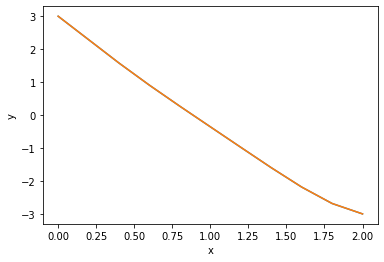

In [56]:
optimizer = Optimizer(f, a, b, ya, yb, h)

result = optimizer.optimize(0.2)
if(result == "ниче нету"):
  print("шото не то")
else:
  optimizer.init_X(result[0])
  hist1 = optimizer.solve_equation(10)

  optimizer.init_X(result[1])
  hist2 = optimizer.solve_equation(10)

  print("Значение y'(a) = h содержится в интервале ({}, {})".format(hist1[0][0],hist2[0][0]))
  print("y'(a) = h = {}, y(b,h) = {}".format(hist1[0][0], hist1[1][-1]))
  print("y'(a) = h = {}, y(b,h) = {}".format(hist2[0][0], hist2[1][-1]))

  plt.plot(hist1[2],hist1[1])
  plt.plot(hist2[2],hist2[1])
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()


## Выводы

В ходе работы были приобретены навыки применения дифференциальных уравнений в различных областях, а также навыки решения краевой задачи для уравнения II-го порядка путём многократного решения задачи Коши.